<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/cha2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2. 데이터 분석 맛보기_2024.07.30**

In [7]:
# 크롬 브라우저에서 웹 페이지의 HTML 살펴보기
# 원하는 정보가 HTML 페이지의 어디에 있는 지 살펴보기 위해서는 크롬의 개발자 도구를 활용하는 것이 편리합니다.
# 크롬 개발자 도구에서는 현재 웹 페이지의 HTML 정보를 살표볼 수 있으며, 필요한 정보에 해당하는 HTML의 위치도 확인할 수 있습니다.

In [8]:
# 크롬 우측 상단에 메뉴 버튼을 클릭한 후 [도구 더보기]-[개발자 도구]를 차례로 클릭하면 개발자 도구가 활성화됩니다.
# 다른 방법으로는 단축키로 F12를 입력하거나, 웹 페이지내에서 마우스 오른쪽 버튼을 클릭한 뒤, [검사]를 선택해도 개발자 도구가 활성화됩니다.

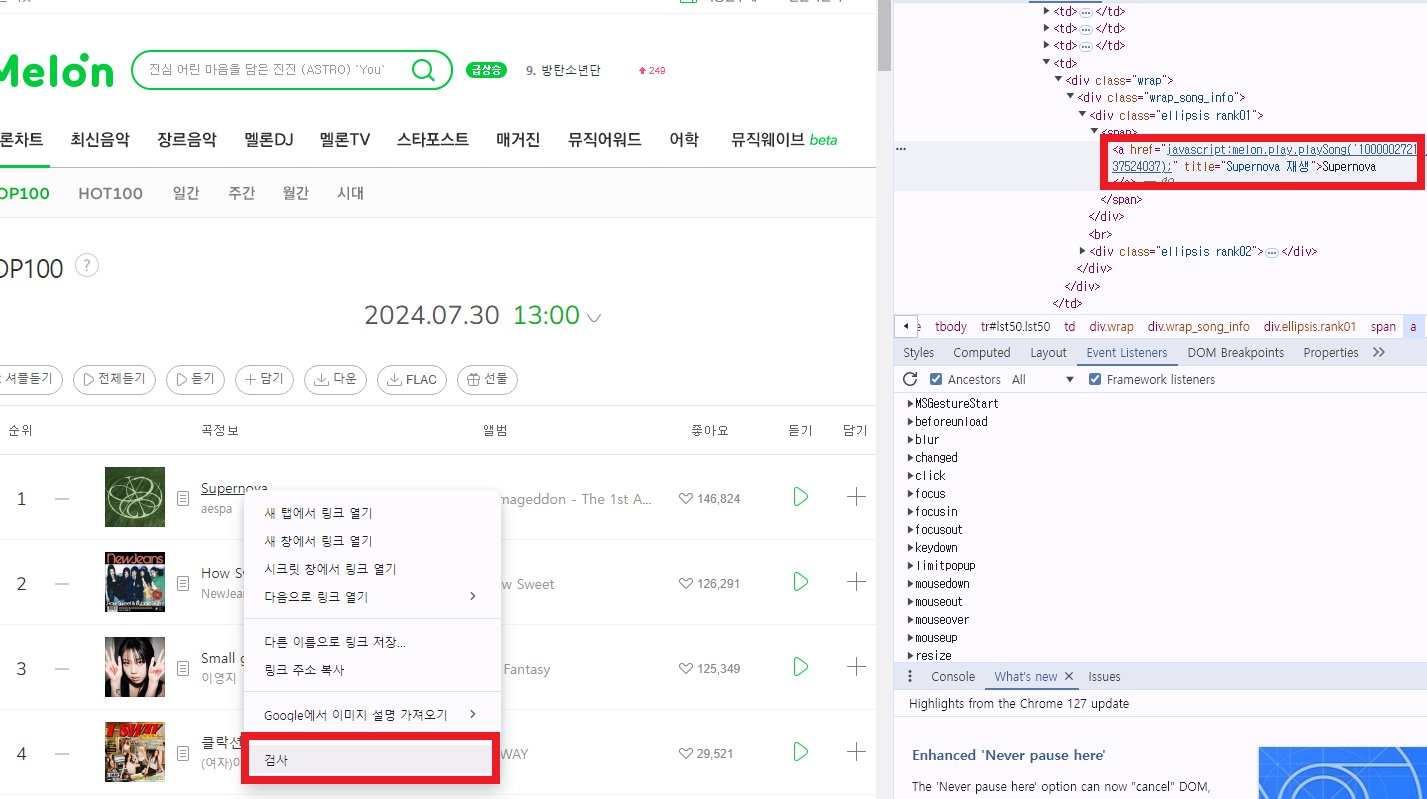

In [9]:
# 개발자 도구 창이 열린 뒤에는 'elements'탭을 클릭해, 현재 열려있는 웹 페이지의 HTML 내용을 확인할 수 있습니다.
# 원하는 정보의 태그를 확인하기 위해서는 해당 영역에서 마우스 오른쪽 버튼을 클릭한 후, '검사'를 선택하면 됩니다.

**BeautifulSoup을 이용한 정보찾기**

In [10]:
html='''
<html>
  <head>
  </head>
  <body>
    <h1> 우리동네사장</h1>
      <div class='sale'>
        <p id='fruits1' class='fruits'>
          <span class='name'> 바나나 </span>
          <span class='price'> 3000원 </span>
          <span class='invertory'> 500개 </span>
          <span class='store'> 가나다상회 </span>
          <a href='http://bit.ly/forPlaywithData'> 홈페이지 </a>
        </p>
      </div>
      <div class = 'prepare'>
        <p id='fruits2' class='fruits'>
          <span class='name'> 파인애플 </span>
        </p>
      </div>
    </body>
  </html>
'''

In [11]:
type(html)

str

**HTML 문자열을 BeautifulSoup으로 해석하기**

In [12]:
# 웹 브라우저에서 특정 사이트에 접속한 뒤, driver.page_source를 이용해 HTML을 다운로드했을 대, 위와 같은 정보가 들어있다고
# 가정하고, 여기서 원하는 정보를 가져와 보겠습니다.

# 문자열 데이터를 HTML 형식으로 읽고, 정보를 쉽게 찾을 수 있도록 BeautifulSoup 라이브버리를 활용하겠습니다.

from bs4 import BeautifulSoup

soup=BeautifulSoup(html, 'html.parser')
# html 변수에 들어 있는 문자열 정보를 HTML 형식에 맞게 해석해서, 원하는 정보를 찾을 수 있도록 준비합니다.

In [13]:
soup


<html>
<head>
</head>
<body>
<h1> 우리동네사장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="invertory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

In [14]:
type(soup)

bs4.BeautifulSoup

**태그 속성 활용: select**

In [15]:
# BeautifulSoup 명령어인 select('조건')을 이용하면 HTML 내에서 입력한 조건을 만족하는 태그를 모두 선택할 수 있습니다.
# 조건 부분에는 해당 태그의 태그명이나 속성값을 지정하거나 태그 간의 구조를 지정할 수도 있고, 또는 두 방법을 모두 활용할 수도 있습니다.

In [16]:
# 태그명으로 태그 찾기
tags_span=soup.select('span')
tags_p=soup.select('p')

print('tags_span값:',tags_span)
print('\n')
print('tags_p값:', tags_p)
# soup.select('조건'): '조건' 부분에 # 기호 뒤에 id값을 넣거나, 점(.) 뒤에 class명을 넣은 방식으로 조건을 지정.

# ids_fruits1=soup.select('#fruits1')
# id(태그명): ids_fruits1=soup.select('#fruits1')
# id값은 특정 대상을 지정하기 위해 사용되므로 HTML 내에서 한 번만 사용 가능합니다.

# class_price=soup.select('.price')
# class: class명이 'price'인 태그를 모두 찾아 class_price 변수에 지정했습니다.
# class 속성: 글꼴, 배경색 등의 서식을 지정하기 위해 사용되며, HTML 내에서 동일한 class명이 여러 번 사용될 수 있습니다.

tags_span값: [<span class="name"> 바나나 </span>, <span class="price"> 3000원 </span>, <span class="invertory"> 500개 </span>, <span class="store"> 가나다상회 </span>, <span class="name"> 파인애플 </span>]


tags_p값: [<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="invertory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>, <p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>]


**상위 구조 활용**

In [17]:
# 정보가 담긴 태그의 속성만으로 찾기가 어려울 경우, 어떠한 부모 태그 아래에 있는 지 등의 정보를 추가해서 찾을 수 있습니다.
tags_name=soup.select('span.name')
print(tags_name)
# 태그명은 span이면서, class명이 name인 태그를 모두 찾아서 tags_name 변수에 저장.

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]


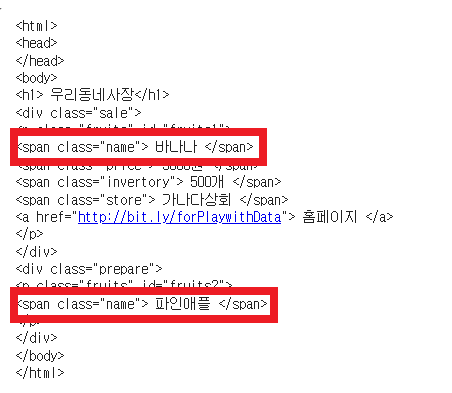

In [18]:
# 태그 구조로 위치 찾기
tags_banana1=soup.select('#fruits1 > span.name')
print(tags_banana1)

# 부모 태그 정보(#fruits1)를 추가함으로써 바나나만 출력되는 것을 확인할 수 있습니다.

[<span class="name"> 바나나 </span>]


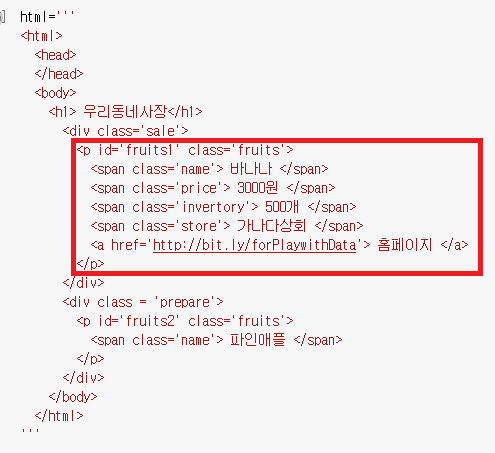

In [19]:
tags_banana2=soup.select('div.sale>#fruits1>span.name')
print('tags_banana2값:',tags_banana2)
# 상위태그1(div.sale) 바로 아래에 있는 상위태그2(#fruits1)를 찾고, 바로 아래에 있는 태그(span.name)를 모두 찾았습니다.

tags_banana3=soup.select('div.sale span.name')
print('tags_banana3값:',tags_banana3)
# 상위태그(div.sale) 바로 아래에 있는 태그뿐 아니라 몇 단계 아래의 태그 중에서 태그 정보(span.name)를 모두 찾았습니다.

tags_banana2값: [<span class="name"> 바나나 </span>]
tags_banana3값: [<span class="name"> 바나나 </span>]


**태그 그룹에서 하나의 태그 선택하기**

In [20]:
# 태그 그룹에서 개별 태그에 접근하기 위해서는 인덱스 번호를 활용하거나, 반복문을 사용할 필요가 있습니다.

# 태그 그룹에서 하나의 태그만 선택
tags=soup.select('span.name')
print('tags값:',tags)

tag_1=tags[0]
print('tag_1값:',tag_1)

tags값: [<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]
tag_1값: <span class="name"> 바나나 </span>


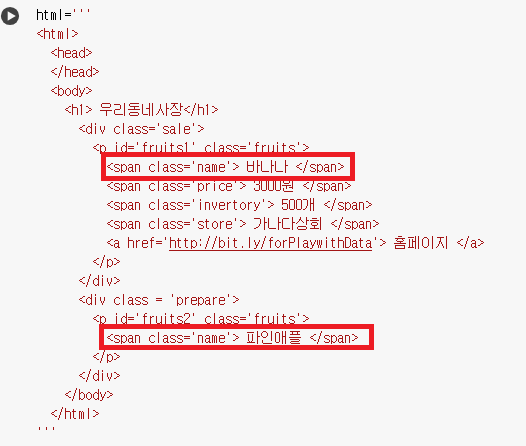

In [21]:
tags=soup.select('span.name')
# 태그 정보가 span.name인 태그를 모두 찾아 tags 변수에 저장.

for tag in tags:
  print('tag값:',tag)

tag값: <span class="name"> 바나나 </span>
tag값: <span class="name"> 파인애플 </span>


**선택한 태그에서 정보 가져오기**

In [22]:
# 인덱스 번호나 반복문을 활용해 원하는 태그를 선택한 다음에는 화면에 보이는 글 부분을 가져오거나(.text)
# 태그 내 속성의 값을 가져올 수 있습니다.['속성명']

# 일반적으로 브라우저에 표시되는 정보를 수집하는 일이 많기에 .text 명령을 자주 활용하지만, 화면에 보이지 않는 URL 주소를
# 수집하기 위해서는 ['href']명령도 필요합니다.

content=TAG.text # 태그에서 화면에 보이는 텍스트 부분만 가져오기
attribute=TAG['속성명'] # 태그 내 속성값 가져오기

NameError: name 'TAG' is not defined

In [23]:
# 태그에서 정보 가져오기
tags=soup.select('a')
print('tags값:',tags)

tag=tags[0]
print('tag값:',tag)

content=tag.text
print('content값:',content)
# tag에 저장된 태그의 화면에 보이는 부분을 선택하기 위해 .text 명령어를 활용했고,
# 이를 출력한 결과로 '홈페이지'를 확인할 수 있습니다.

link=tag['href']
print('link값:',link)

tags값: [<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>]
tag값: <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
content값:  홈페이지 
link값: http://bit.ly/forPlaywithData


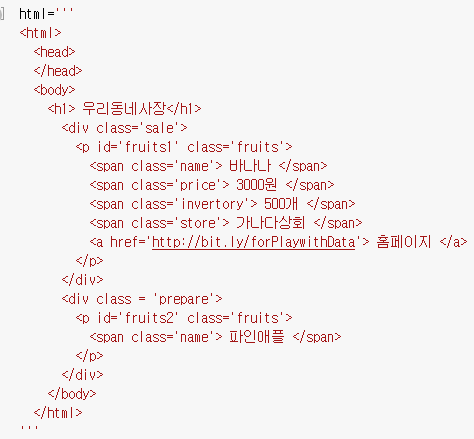

**멜론 노래 순위 정보 크롤링**

In [24]:
# 느낌표를 붙이면 Shell 명령어로 실행됩니다.
!python --version

# Selenium을 확인하려면 다음과 같이 사용해야 합니다.
import selenium
print(selenium.__version__)

Python 3.10.12
4.31.1


In [25]:
# 코랩을 시작할 때 아래코드를 한 번 돌려줍니다.
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

In [26]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [28]:
!pip install chromedriver-autoinstalle

ERROR: Could not find a version that satisfies the requirement chromedriver-autoinstalle (from versions: none)
ERROR: No matching distribution found for chromedriver-autoinstalle


In [29]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [30]:
!pip install selenium
!apt-get update

# (최초 1회)
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver '/content/drive/MyDrive/Colab Notebooks' #
!pip install chromedriver-autoinstaller

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

In [31]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import sys
from selenium.webdriver.common.keys import Keys
import urllib.request
import os
from urllib.request import urlretrieve

import time
import pandas as pd
import chromedriver_autoinstaller  # setup chrome options

chrome_path = "/content/drive/MyDrive/Colab Notebooks/chromedriver"

sys.path.insert(0,chrome_path)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')  # set path to chromedriver as per your configuration
chrome_options.add_argument('lang=ko_KR') # 한국어

chromedriver_autoinstaller.install()  # set the target URL

In [40]:
url = "https://www.melon.com/chart/index.htm"  # set up the webdriver

driver = webdriver.Chrome(options=chrome_options)

In [41]:
driver.get(url)

In [42]:
# 현재 웹 페이지의 hml 정보를 받아 온 뒤, 노래 제목, 가수 등의 필요한 정보를 추출하기 위해
# BeautifulSoup으로 읽겠습니다.

# HTML 다운로드 및 BeautifulSoup으로 읽기
from bs4 import BeautifulSoup
html=driver.page_source
soup=BeautifulSoup(html, 'html.parser')

In [43]:
html

'<html lang="ko" class="narrow-screen"><head>\n\t\t\n\t\n\t\n\t\n\t\n\n\t\n\n\t\n\t\n\t\n\t\n\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n\t\n\n\t\n\n\t<title>멜론차트&gt;TOP100&gt;멜론</title>\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널">\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!">\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b">\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc">\n\t<meta property="fb:app_id" content="357952407588971">\n\t<meta property="og:title" content="Melon">\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png">\n\t<meta property="og:description" content="음악이 필요한 순간, 멜론">\n\t<meta property="og:url" content="http://www.melon.

In [44]:
songs=soup.select('#lst50')
print(songs[0])

50
<tr class="lst50" data-song-no="37524037" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="Supernova 곡 선택" type="checkbox" value="37524037"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11487023');" title="Armageddon - The 1st Album">
<img alt="Armageddon - The 1st Album - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/114/87/023/11487023_20240527154018_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type03 

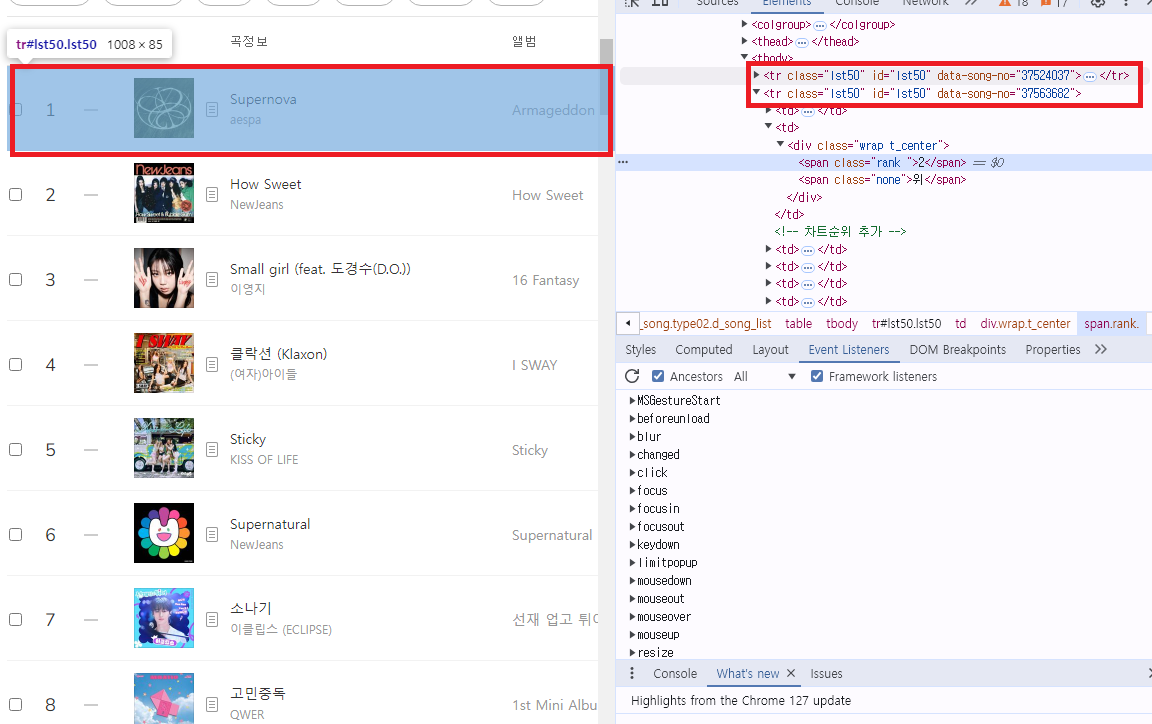

In [46]:
# 위의 그림: 태그명 - tr, class명 - lst50, id - lst50

# <tr class="lst50" id="lst50" data-song-no="37524037"> <td><div class="wrap t_right">
# soup.select('#lst50')을 통해, id값이 lst50인 태그를 모두 찾았습니다.

# <input type="checkbox" title="Supernova 곡 선택" class="input_check " name="input_check" value="37524037">
# </div></td> <td><div class="wrap t_center"><span class="rank ">1</span><span class="none">위</span></div></td>
#<!-- 차트순위 추가 --> <td><div class="wrap"> <span title="순위 동일" class="rank_wrap"> <span class="bullet_icons rank_static">
# <span class="none">순위 동일</span></span> <span class="none">0</span> </span> </div></td> <td><div class="wrap">
# <a href="javascript:melon.link.goAlbumDetail('11487023');" title="Armageddon - The 1st Album" class="image_typeAll">
#<img onerror="WEBPOCIMG.defaultAlbumImg(this);" width="60" height="60"
# src="https://cdnimg.melon.co.kr/cm2/album/images/114/87/023/11487023_20240527154018_500.jpg/melon/resize/120/quality/80/optimize"
# alt="Armageddon - The 1st Album - 페이지 이동"> <span class="bg_album_frame"></span> </a> </div></td> <td><div class="wrap">
# <a href="javascript:melon.link.goSongDetail('37524037');" title="Supernova 곡정보" class="btn button_icons type03 song_info">
# <span class="none">곡정보</span></a> </div></td> <td><div class="wrap"> <div class="wrap_song_info"> <div class="ellipsis rank01">
# <span> <a href="javascript:melon.play.playSong('1000002721',37524037);" title="Supernova 재생">Supernova</a> </span></div><br>
# <div class="ellipsis rank02"> <a href="javascript:melon.link.goArtistDetail('2899555');" title="aespa - 페이지 이동">aespa</a>
# <span class="checkEllipsis" style="display: none;"><a href="javascript:melon.link.goArtistDetail('2899555');" title="aespa -
# 페이지 이동">aespa</a></span> </div> </div> </div></td> <td><div class="wrap"> <div class="wrap_song_info"> <div class="ellipsis rank03">
# <a href="javascript:melon.link.goAlbumDetail('11487023');" title="Armageddon - The 1st Album - 페이지 이동">Armageddon - The 1st Album</a>
# </div> </div> </div></td> <td><div class="wrap"> <button type="button" class="button_etc like" title="Supernova 좋아요" data-song-no="37524037"
# data-song-menuid="1000002721"><span class="odd_span">좋아요</span> <span class="cnt"> <span class="none">총건수</span> 146,868</span></button>
# </div></td> <td><div class="wrap t_center"> <button type="button" title="듣기" class="button_icons play " onclick="melon.play.playSong('1000002721',37524037);">
# <span class="none">듣기</span></button> </div></td> <td><div class="wrap t_center"> <button type="button" title="담기" class="button_icons scrap "
# onclick="melon.play.addPlayList('37524037');"><span class="none">담기</span></button> </div></td> <td><div class="wrap t_center"> <button type="button" title="다운로드"
# class="button_icons download " onclick="melon.buy.goBuyProduct('frm', '37524037', '3C0001', '','0', '1000002721');"><span class="none">다운로드</span></button>
# </div></td> <td><div class="wrap t_center"> <button type="button" title="뮤직비디오" class="button_icons video " onclick="melon.link.goMvDetail('1000002721', '37524037','song');">
# <span class="none">뮤직비디오</span></button> </div></td> </tr>

print(len(songs))
# 결과 창에서 나온 50에서 확인할 수 있듯이 해당 조건을 만족하는 태그는 모두 50개가 있습니다.
# 이 숫잔ㄴ 웹 페이지에서 가져오려고 하는 1위부터 50위까지의 곡 수와 일치합니다.

50


In [47]:
print(songs[0])
# 선택된 태그 중 1번째 태그를 화면에 출력

<tr class="lst50" data-song-no="37524037" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="Supernova 곡 선택" type="checkbox" value="37524037"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11487023');" title="Armageddon - The 1st Album">
<img alt="Armageddon - The 1st Album - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/114/87/023/11487023_20240527154018_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type03 son

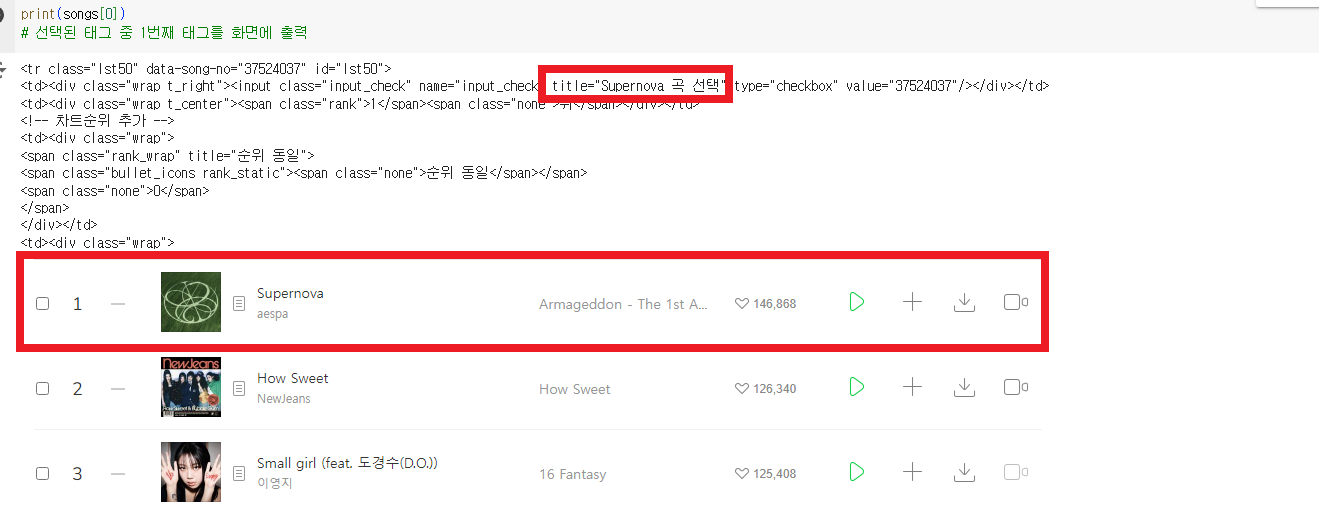

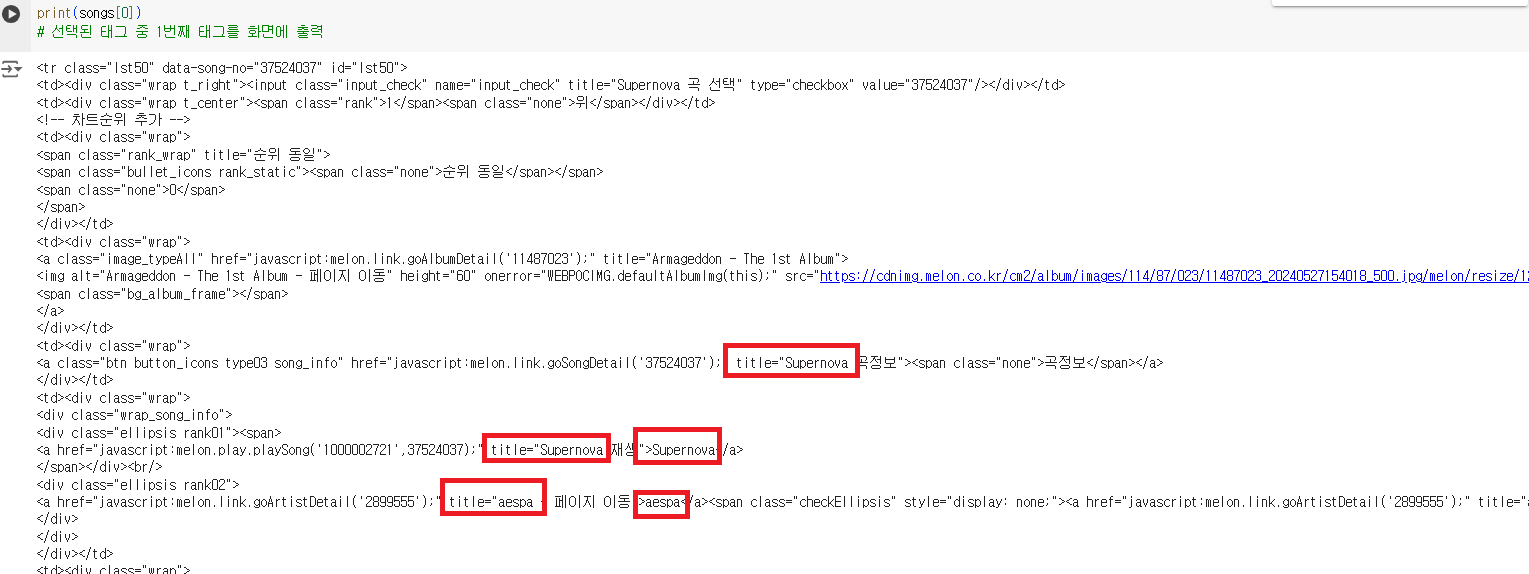

In [ ]:
# 위의 사진을 통해 HTML 코드 속에서 현재 웹 페이지에서 볼 수 있는 것처럼, 1위 곡의 제목과 가수를 확인할 수 있습니다.
# 즉, 노래 정보를 포함하는 태그들을 잘 찾은 것을 알 수 있습니다.

# 한 곡의 노래 태그에 해당하는 HTML 코드에서 노래 제목과 가수를 찾아보겠습니다. 1위 곡의 정보를 먼저 찾은 뒤 반복문을 통해
# 50개의 노래들의 제목과 가수를 찾아볼 것입니다.

In [49]:
# 한개의 곡 정보 지정하기
song=songs[0]
print('song값',song)

song값 <tr class="lst50" data-song-no="37524037" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="Supernova 곡 선택" type="checkbox" value="37524037"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11487023');" title="Armageddon - The 1st Album">
<img alt="Armageddon - The 1st Album - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/114/87/023/11487023_20240527154018_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type

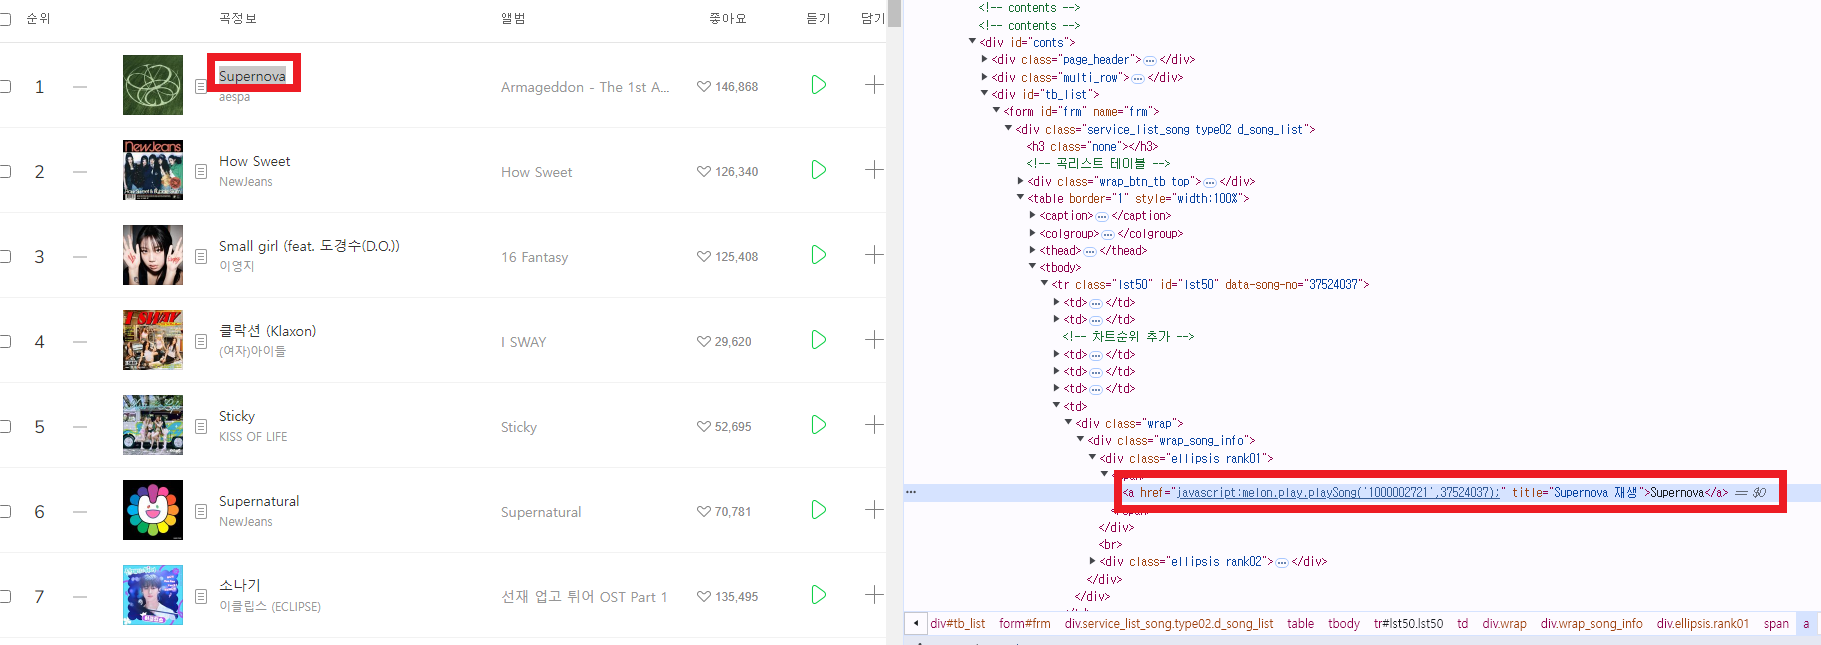

In [50]:
# 태그명이 a이면서, href와 title을 속성으로 가지는 태그에 정보가 들어있습니다.
# <a href="javascript: melon.play.playSong('1000002721', 37524037); title="Supernova 재생">Supernova</a>=$0
title=song.select('a')
len(title)

# len()을 이용해 조건에 만족하는 태그의 개수를 살펴보니 6개인 것을 확인됩니다.
# 현재 6개가 선택되어 내가 원하는 곡 제목이 포함된 태그만 선택해 정보를 가져올 수 없습니다.
# 태그명 a외에 검색 조건을 추가하겠습니다. -> 원하는 조건의 값만 구하기 위해서, 상위 태그는 span 태그임을 추가.

6

In [51]:
title=song.select('span>a')
len(title)

2

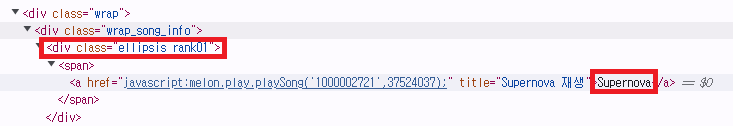

In [53]:
title=song.select('div.ellipsis.rank01>span>a')
len(title)

# 1번째 코드를 통해 태그명이 div이면서, class명이 ellipsis이며, rank01인 태그 바로 아래에 있는
# span태그, 그 바로 아래에 존재하는 a 태그를 모두 찾았습니다. 이번에는 해당하는 태그의 개수가 1개로
# 나왔습니다.

1

**곡 제목 가져오기**

In [57]:
title=song.select('div.ellipsis.rank01>span>a')[0].text
title

# .text를 통해, 해당 태그의 텍스트 부분을 선택했습니다.
# .select()의 경우, 조건에 해당하는 데이터를 모두 선택하기 때문에
# 인덱스 번호를 이용해 1번째 데이터를 선택하는 과정이 꼭 필요합니다.

'Supernova'

In [56]:
title1=song.select('div.ellipsis.rank01>span>a')
title1

[<a href="javascript:melon.play.playSong('1000002721',37524037);" title="Supernova 재생">Supernova</a>]

**가수 찾기**

In [59]:
singer=song.select('div.ellipsis.rank02>span>a')
len(singer)

1

In [60]:
singer=song.select('div.ellipsis.rank02>span>a')[0].text
singer

'aespa'

**50개의 노래에서 노래 제목과 가수 정보 추출**

In [61]:
songs

[<tr class="lst50" data-song-no="37524037" id="lst50">
 <td><div class="wrap t_right"><input class="input_check" name="input_check" title="Supernova 곡 선택" type="checkbox" value="37524037"/></div></td>
 <td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
 <!-- 차트순위 추가 -->
 <td><div class="wrap">
 <span class="rank_wrap" title="순위 동일">
 <span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
 <span class="none">0</span>
 </span>
 </div></td>
 <td><div class="wrap">
 <a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11487023');" title="Armageddon - The 1st Album">
 <img alt="Armageddon - The 1st Album - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/114/87/023/11487023_20240527154018_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
 <span class="bg_album_frame"></span>
 </a>
 </div></td>
 <td><div class="wrap">
 <a class="btn butto

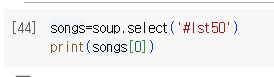

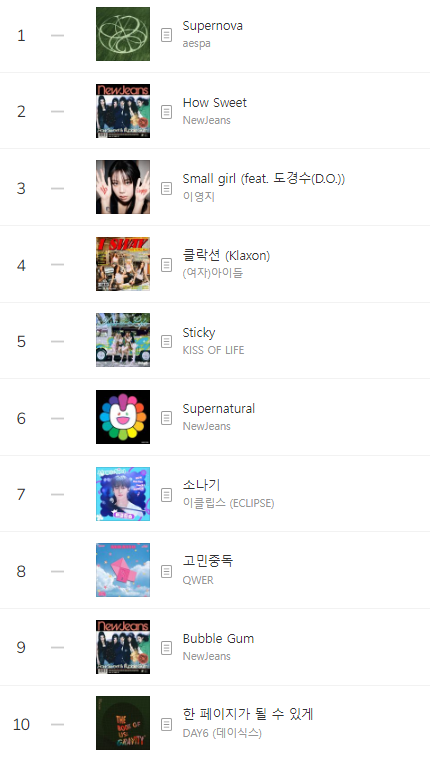

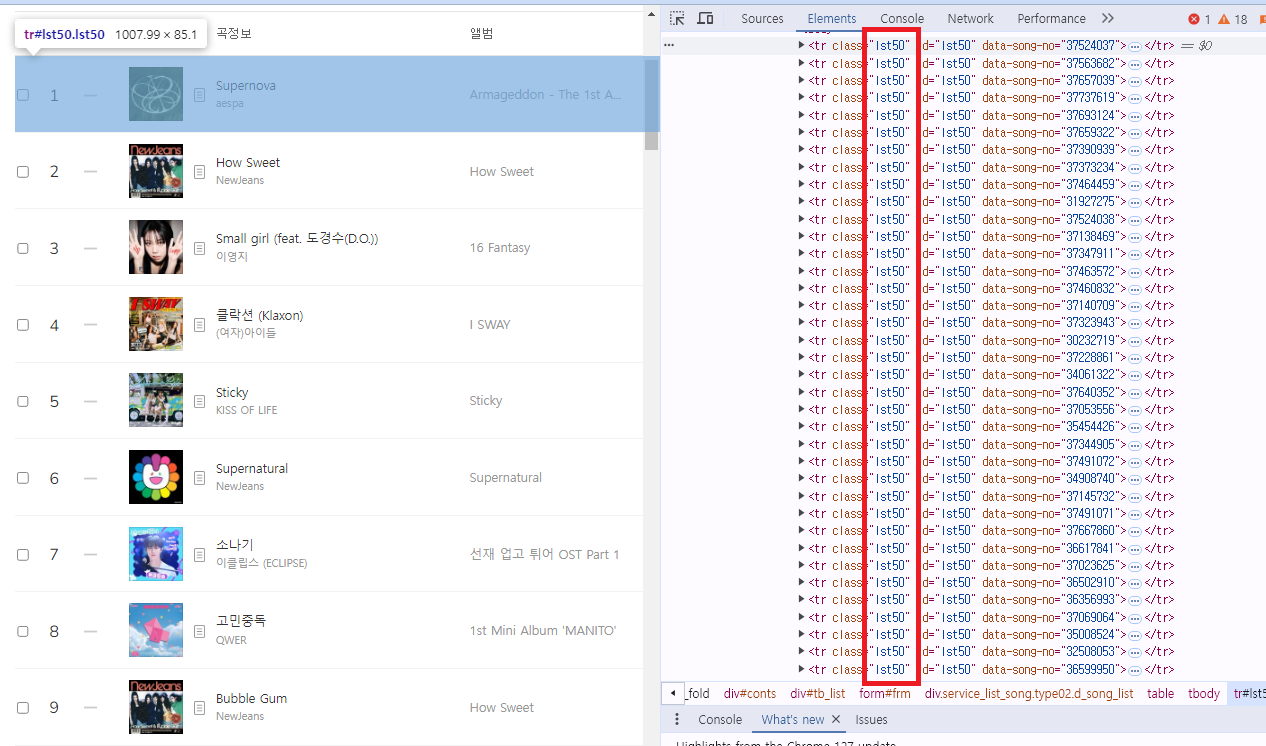

In [62]:
for song in songs:
  title=song.select('div.ellipsis.rank01>span>a')[0].text
  singer=song.select('div.ellipsis.rank02>a')[0].text
  print(title, singer, sep='|')

Supernova|aespa
How Sweet|NewJeans
Small girl (feat. 도경수(D.O.))|이영지
클락션 (Klaxon)|(여자)아이들
Sticky|KISS OF LIFE
Supernatural|NewJeans
소나기|이클립스 (ECLIPSE)
고민중독|QWER
Bubble Gum|NewJeans
한 페이지가 될 수 있게|DAY6 (데이식스)
Armageddon|aespa
나는 아픈 건 딱 질색이니까|(여자)아이들
Magnetic|아일릿(ILLIT)
해야 (HEYA)|IVE (아이브)
SPOT! (feat. JENNIE)|지코 (ZICO)
첫 만남은 계획대로 되지 않아|TWS (투어스)
Welcome to the Show|DAY6 (데이식스)
예뻤어|DAY6 (데이식스)
천상연|이창섭
사랑은 늘 도망가|임영웅
Boom Boom Bass|RIIZE
에피소드|이무진
Hype Boy|NewJeans
미안해 미워해 사랑해|Crush
온기|임영웅
우리들의 블루스|임영웅
Love wins all|아이유
Home|임영웅
내가 S면 넌 나의 N이 되어줘|TWS (투어스)
Seven (feat. Latto) - Clean Ver.|정국
비의 랩소디|임재현
모래 알갱이|임영웅
I AM|IVE (아이브)
슬픈 초대장|순순희(지환)
다시 만날 수 있을까|임영웅
이제 나만 믿어요|임영웅
Super Shy|NewJeans
ETA|NewJeans
그대만 있다면 (여름날 우리 X 너드커넥션 (Nerd Connection))|너드커넥션 (Nerd Connection)
Do or Die|임영웅
Attention|NewJeans
오래된 노래|허각
밤양갱|비비 (BIBI)
무지개|임영웅
WAY 4 LUV|PLAVE
Polaroid|임영웅
London Boy|임영웅
SHEESH|BABYMONSTER
To. X|태연 (TAEYEON)
헤어지자 말해요|박재정


In [ ]:
# 반복문을 통해 songs에 들어있는 50개의 노래 정보 속에서 한 곡씩 곡 제목과 가수를 출력했습니다.

**멜론 인기차트 중 상위 50곡 크롤링(정리)**

In [65]:
# 코랩을 시작할 때 아래코드를 한 번 돌려줍니다.
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

from selenium import webdriver
from selenium.webdriver.common.by import By

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

!pip install selenium
!apt-get update

# (최초 1회)
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver '/content/drive/MyDrive/Colab Notebooks' #
!pip install chromedriver-autoinstaller

!pip install selenium
!apt-get update

# (최초 1회)
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver '/content/drive/MyDrive/Colab Notebooks' #
!pip install chromedriver-autoinstaller

from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import sys
from selenium.webdriver.common.keys import Keys
import urllib.request
import os
from urllib.request import urlretrieve

import time
import pandas as pd
import chromedriver_autoinstaller  # setup chrome options

chrome_path = "/content/drive/MyDrive/Colab Notebooks/chromedriver"

sys.path.insert(0,chrome_path)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')  # set path to chromedriver as per your configuration
chrome_options.add_argument('lang=ko_KR') # 한국어

chromedriver_autoinstaller.install()  # set the target URL

driver = webdriver.Chrome(options=chrome_options)
url='https://www.melon.com/chart/index.htm'
driver.get(url)

html=driver.page_source
soup=BeautifulSoup(html, 'html.parser')

for song in songs:
  title=song.select('div.ellipsis.rank01>span>a')[0].text
  singer=song.select('div.ellipsis.rank02>a')[0].text
  print(title, singer, sep='|')

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy Release
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 257 kB in 1s (181 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to pro

**selenium을 활용한 크롤링**

In [ ]:
# 앞서 살펴본 방법: selenium으로 크롬 브라우저를 조작해서 웹 페이지에 접속한 뒤,
# BeautifulSoup를 활용해 원하는 정보를 가져오는 방식.

# selenium에서는 BeautifulSoup을 사용하지 않고도 필요한 정보를 찾아오는 명령어가 있습니다.
# driver.find_elements_by_css_selector('조건')

In [ ]:
songs=driver.find_elements_by_css_selector('#lst50')
for song in songs:
  title=song.find_elements_by_css_selector('div.ellipsis.rank01>span>a')[0].text
  signer=song.find_elements_by_css_selector('div.ellipsis.rank02>a')[0].text
  print(title, singer, sep='|')

In [67]:
# 크롤링 방식의 장단점 비교

# Selenium + BeautifulSoup
# 1) 웹 페이지 접속: HTML 정보 다운로드 후 브라우저 영향 없음
# 2) 웹 페이지 동작: 불가능
# 3) 크롤링 속도: 빠름

In [ ]:
# Selenium만 이용
# 1) 웹 페이지 접속: 웹 페이지 연결 유지 필요
# 2) 웹 페이지 동작: 클릭, 입력 등 조작 가능
# 3) 크롤링 속도: 느림

In [ ]:
# BeautifulSoup을 사용하는 방식: 웹 페이지의 HTML 정보를
# 다운로드한 뒤에는 브라우저에서 정보를 가져오지 않습니다.

# 모든 정보를 다운로드한 뒤 그 안에서 필요한 내용을 찾는 것이기에 속도가 빠릅니다.

# selenium만 이용할 경우, 웹 페이지에 계속 접속하고 잇기 때문에 필요한 내용을 찾을 때
# 시간이 오래 걸립니다. 하지만 접속한 상태이므로 특정 위치를 선택한 뒤, 클릭하거나 값을
# 입력하고 삭제하는 등의 브라우저 조작이 가능합니다.